# Manifold learning

## toy dataset

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# Next line to silence pyflakes. This import is needed.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

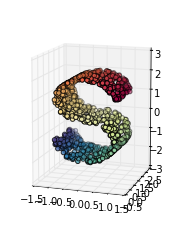

In [3]:
from sklearn import datasets

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(3, 4))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
axis.view_init(10, -72)

## mainfold learning algorithm

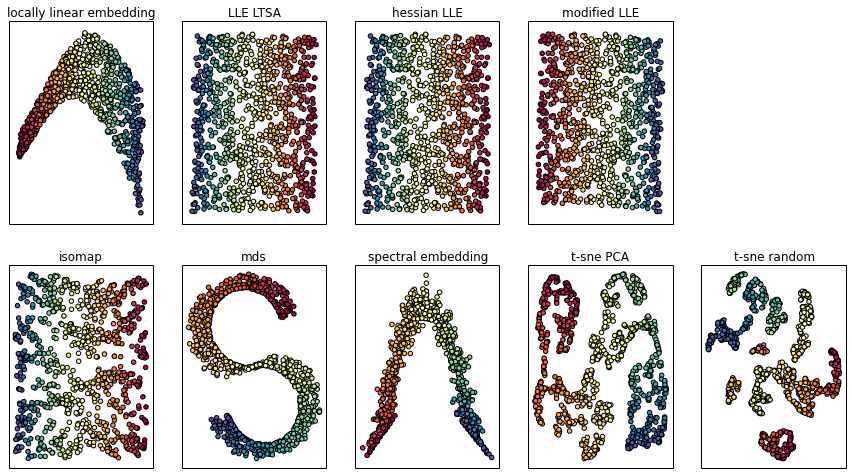

In [4]:
from sklearn import manifold

n_neighbors = 10
n_components = 2

manifolds = [
    {'name':'locally linear embedding', 'algorithm':manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='standard')},
    {'name':'LLE LTSA',                 'algorithm':manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='ltsa')},
    {'name':'hessian LLE',              'algorithm':manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='hessian')},
    {'name':'modified LLE',             'algorithm':manifold.LocallyLinearEmbedding(n_neighbors, n_components, eigen_solver='auto', method='modified')},
    {'name':'skip',                     'algorithm':None},
    {'name':'isomap',                   'algorithm':manifold.Isomap(n_neighbors, n_components)},
    {'name':'mds',                      'algorithm':manifold.MDS(n_components, max_iter=100, n_init=1)},
    {'name':'spectral embedding',       'algorithm':manifold.SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors)},
    {'name':'t-sne PCA',                'algorithm':manifold.TSNE(n_components=n_components, init='pca', random_state=0)},
    {'name':'t-sne random',             'algorithm':manifold.TSNE(n_components=n_components, init='random', random_state=0)},
]

split=len(manifolds)/2
plt.figure(figsize=(split * 3, 2 * 4))
for i, algorithm in enumerate(manifolds):
    if not algorithm['algorithm']:
        continue
    Y = algorithm['algorithm'].fit_transform(X)
    
    splot = plt.subplot(2, split, i+1)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title(algorithm['name'])
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
                 